# Table of Contents

1. [Logistic Regression](#logreg)
    1. [Visualizing the data](#plot)
    2. [Implementation](#implementation)
        1. [Warmup exercise: sigmoid function](#sigmoid)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<div id='logreg'/>

## 1. Logistic Regression

In [2]:
# import the data 
data_directory = '~/Documents/Machine-Learning/Week 3/01. Data/'
file = 'ex2data1.txt'
df = pd.read_csv(data_directory+file, names = ['exam_1','exam_2', 'admit'])

In [3]:
df.head()

,exam_1,exam_2,admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.describe()

,exam_1,exam_2,admit
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


<div id='plot'/>

### 1.1 Visualizing the data

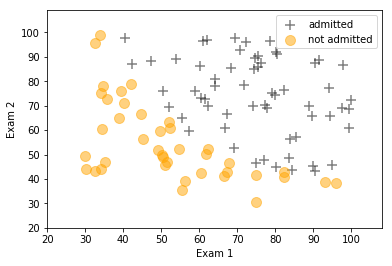

In [61]:
colors = ['black', 'orange']

plt.figure()

y = plt.scatter(df['exam_1'].loc[df['admit'] == 1], df['exam_2'].loc[df['admit'] == 1], marker='+', color=colors[0], s=100, alpha= 0.5)
n = plt.scatter(df['exam_1'].loc[df['admit'] == 0], df['exam_2'].loc[df['admit'] == 0], marker='o', color=colors[1], s=100, alpha=0.5)

plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

plt.xlim(20,108)
plt.ylim(20,109)

plt.legend((y,n), ('admitted','not admitted'), loc='upper right')

plt.show()

<div id='implementation'/>

### 1.2 Implementation

<div id='sigmoid'/>

#### 1.2.1 Warmup exercise: sigmoid function

The logistic regression hypothesis is defined by:

$$ h_{\theta}(x) = g(\theta^Tx) $$

where the function $g$ is the sigmoid function defined as:

$$ g(z) = \frac{1}{1 + e^{-z}} $$



In [62]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return(g)

In [67]:
# lets try the sigmoid function
print('With a value of z=2 (large positive number), the sigmoid function should be close to 1. It is {}'.format(round(sigmoid(2),2)))
print('With a value of z=2, the sigmoid function should be equal to 0.5. It is {}'.format(sigmoid(0)))
print('With a value of z=-2 (large negative number), the sigmoid function should be close to 0. It is {}'.format(round(sigmoid(-2),2)))

With a value of z=2 (large positive number), the sigmoid function should be close to 1. It is 0.88
With a value of z=2, the sigmoid function should be equal to 0.5. It is 0.5
With a value of z=-2 (large negative number), the sigmoid function should be close to 0. It is 0.12
